#**LUNG CANCER PREDICTION**
![Lung Cancer Prediction](https://github.com/iamnaveen1401/Lung-Cancer-Prediction/blob/main/Lung%20Cancer%20-%20image.png?raw=true)


##**Introduction**

Lung cancer is one of the deadliest cancers worldwide, mainly due to late detection. Early diagnosis can save lives, and this is where machine learning (ML) plays a vital role. This project aims to build an ML model to predict the risk of lung cancer based on factors like age, smoking history, and health conditions. By identifying high-risk individuals early, the model can support quicker diagnosis and better treatment decisions.



##**Objective**

The objective of this project is to build a machine learning model capable of predicting the likelihood of lung cancer in individuals using features such as age, smoking habits, and other health indicators. By leveraging historical data and classification algorithms, the goal is to create a reliable prediction system that can assist healthcare professionals in identifying high-risk individuals for early diagnosis and timely medical intervention.

##**Problem Statement**

Lung cancer continues to be one of the most fatal types of cancer due to challenges in early detection and diagnosis. Traditional diagnostic methods are often invasive, time-consuming, or expensive, leading to delayed treatment and poor survival rates. There is a pressing need for an efficient, non-invasive, and accurate approach to identify individuals at high risk of developing lung cancer based on available clinical and behavioral data.



##**Dataset Description**

This dataset contains 20,000 anonymized patient records, each with 16 attributes (15 features + 1 target variable) related to lung cancer risk factors and symptoms. The data is designed for binary classification, with the goal of predicting whether a patient has lung cancer based on various demographic, lifestyle, and health-related indicators.



| **Feature**                | **Description**                                          |
|----------------------------|----------------------------------------------------------|
| **GENDER**                 | Patient's gender                                         |
| **AGE**                    | Patient's age (years)                                    |
| **SMOKING**                | Smoking habit                                            |
| **YELLOW_FINGERS**         | Yellow discoloration in fingers                          |
| **ANXIETY**                | Presence of anxiety                                      |
| **PEER_PRESSURE**          | Exposure to peer pressure (e.g., smoking influence)      |
| **CHRONIC_DISEASE**        | Presence of chronic disease                              |
| **FATIGUE**                | Fatigue levels                                           |
| **ALLERGY**                | Presence of allergies                                    |
| **WHEEZING**               | Wheezing symptoms                                        |
| **ALCOHOL_CONSUMING**      | Alcohol consumption                                      |
| **COUGHING**               | Coughing severity                                        |
| **SHORTNESS_OF_BREATH**    | Breathing difficulties                                    |
| **SWALLOWING_DIFFICULTY**  | Difficulty in swallowing                                 |
| **CHEST_PAIN**             | Presence of chest pain                                   |
| **LUNG_CANCER**    | Presence of lung cancer                       |





##**Target Variable (Dependent Variable)**

The target variable is used for binary classification to predict the presence of lung cancer: **LUNG_CANCER** (YES, NO).

##**Import Packages And Dataset Loading**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataset URL Link
URL = "https://raw.githubusercontent.com/iamnaveen1401/Lung-Cancer-Prediction/refs/heads/main/Lung%20Cancer%20-%20Dataset.csv"

In [ ]:
# Load Dataset
df = pd.read_csv(URL)

##**Exploratory Data Analysis (EDA)**

In [ ]:
# Head - 1st five rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,YES,NO,NO,YES,NO,YES,NO,NO,YES,YES,YES,NO,NO,YES
1,M,71.0,YES,YES,NO,NO,YES,NO,YES,YES,NO,NO,YES,YES,NO,YES
2,M,61.0,YES,NO,NO,YES,YES,NO,YES,YES,NO,NO,YES,YES,YES,NO
3,M,55.0,YES,YES,NO,YES,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES
4,F,56.0,YES,NO,NO,NO,NO,YES,YES,YES,YES,NO,YES,YES,YES,YES


In [ ]:
# Tail - last 5 rows
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
19995,M,78.0,NO,YES,NO,YES,NO,YES,NO,NO,YES,YES,YES,YES,YES,NO
19996,M,61.0,YES,YES,YES,NO,NO,YES,YES,NO,NO,NO,YES,NO,NO,NO
19997,M,58.0,NO,NO,NO,NO,YES,NO,YES,YES,YES,NO,NO,YES,NO,YES
19998,F,67.0,YES,NO,YES,YES,YES,NO,YES,YES,NO,YES,NO,YES,YES,YES
19999,F,57.0,YES,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,YES


In [ ]:
# Sample - Random 5 rows
df.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
12681,F,63.0,YES,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,YES,YES,YES
3492,F,68.0,NO,YES,NO,YES,YES,YES,NO,YES,YES,NO,NO,NO,NO,YES
19649,M,59.0,YES,YES,YES,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES
19376,M,57.0,NO,YES,YES,NO,NO,YES,YES,NO,YES,NO,YES,YES,YES,YES
17830,F,50.0,YES,YES,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,NO,YES


In [ ]:
# Shape of dataset (rows and columns)
df.shape

(20000, 16)

In [ ]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 20000 non-null  object 
 1   AGE                    19942 non-null  float64
 2   SMOKING                19607 non-null  object 
 3   YELLOW_FINGERS         20000 non-null  object 
 4   ANXIETY                20000 non-null  object 
 5   PEER_PRESSURE          20000 non-null  object 
 6   CHRONIC DISEASE        20000 non-null  object 
 7   FATIGUE                20000 non-null  object 
 8   ALLERGY                20000 non-null  object 
 9   WHEEZING               19057 non-null  object 
 10  ALCOHOL CONSUMING      19348 non-null  object 
 11  COUGHING               20000 non-null  object 
 12  SHORTNESS OF BREATH    19915 non-null  object 
 13  SWALLOWING DIFFICULTY  20000 non-null  object 
 14  CHEST PAIN             20000 non-null  object 
 15  LU

In [ ]:
# Summary Statistics
df.describe()

,AGE
count,19942.000000
mean,62.200431
std,8.206208
min,30.000000
25%,57.000000
50%,62.000000
75%,68.000000
max,87.000000


In [ ]:
# Find Unique Values
df.nunique()

,0
GENDER,2
AGE,58
SMOKING,2
YELLOW_FINGERS,2
ANXIETY,2
PEER_PRESSURE,2
CHRONIC DISEASE,2
FATIGUE,2
ALLERGY,2
WHEEZING,2


In [ ]:
# Check Missing Values
print(df.isnull().sum())

GENDER                     0
AGE                       58
SMOKING                  393
YELLOW_FINGERS             0
ANXIETY                    0
PEER_PRESSURE              0
CHRONIC DISEASE            0
FATIGUE                    0
ALLERGY                    0
WHEEZING                 943
ALCOHOL CONSUMING        652
COUGHING                   0
SHORTNESS OF BREATH       85
SWALLOWING DIFFICULTY      0
CHEST PAIN                 0
LUNG_CANCER                0
dtype: int64


In [ ]:
# Check Duplicate
print(df.duplicated().sum())

346


In [ ]:
# Finding Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.to_list()

['GENDER',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [ ]:
# Finding Numerical Columns
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['AGE'], dtype='object')

##**EDA (Visualization)**

### Count Plot

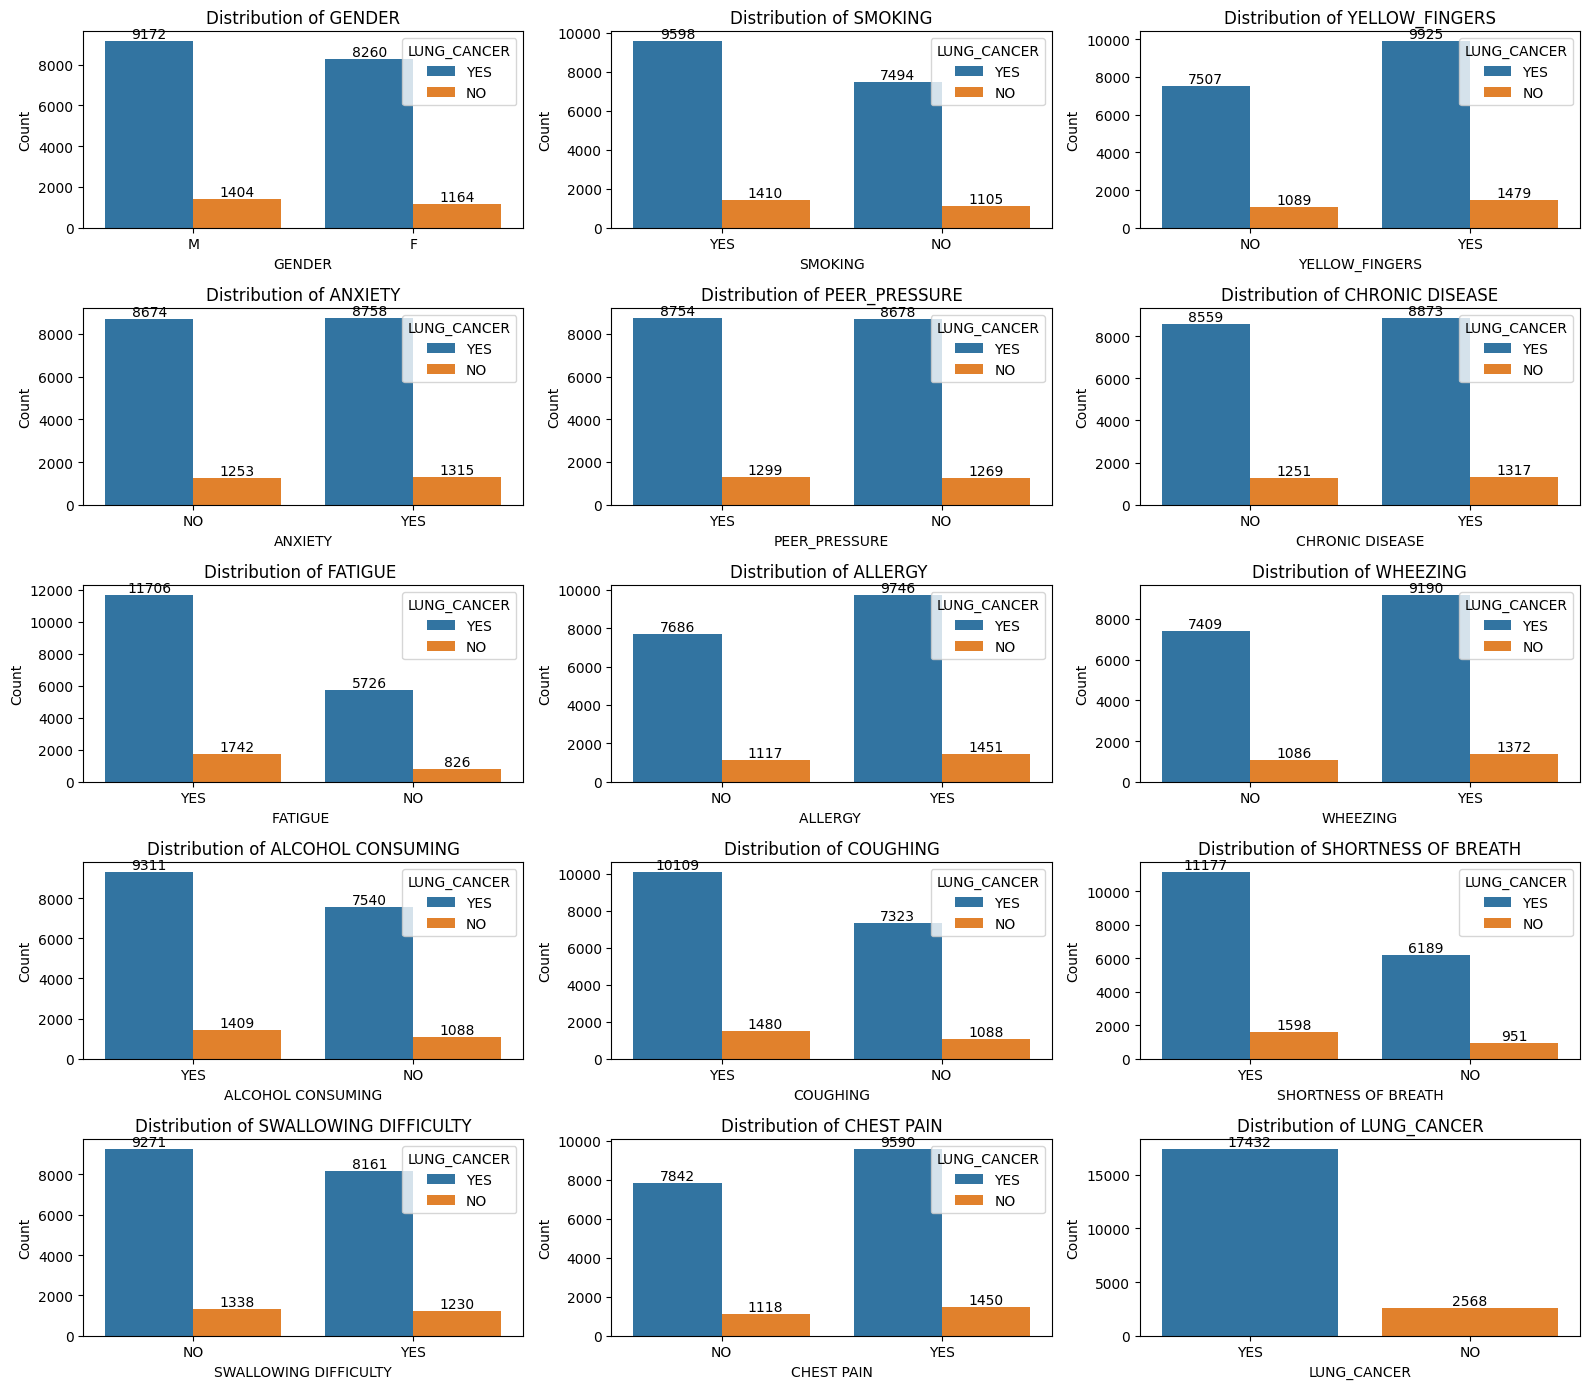

In [ ]:
# Plot the Count plot with Bar Labels for all Categorical Columns
plt.figure(figsize=(16,14))
for i,col in enumerate (categorical_cols,1):
   plt.subplot(5,3,i)
   ax = sns.countplot(x=col, hue='LUNG_CANCER', data=df)
   for container in ax.containers:
      ax.bar_label(container)
   plt.title(f'Distribution of {col}')
   plt.xlabel(col)
   plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='SMOKING', ylabel='count'>

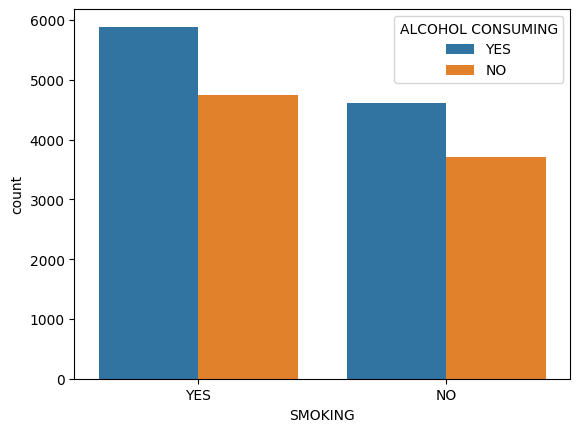

In [ ]:
sns.countplot(data=df, x='SMOKING', hue='ALCOHOL CONSUMING')

<Axes: xlabel='SMOKING', ylabel='count'>

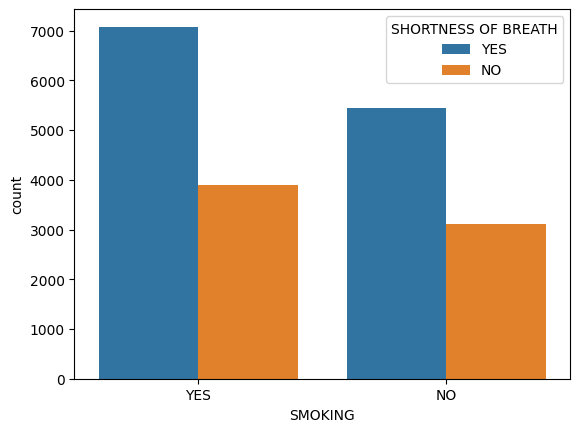

In [ ]:
sns.countplot(data=df, x='SMOKING', hue='SHORTNESS OF BREATH')

### Histogram

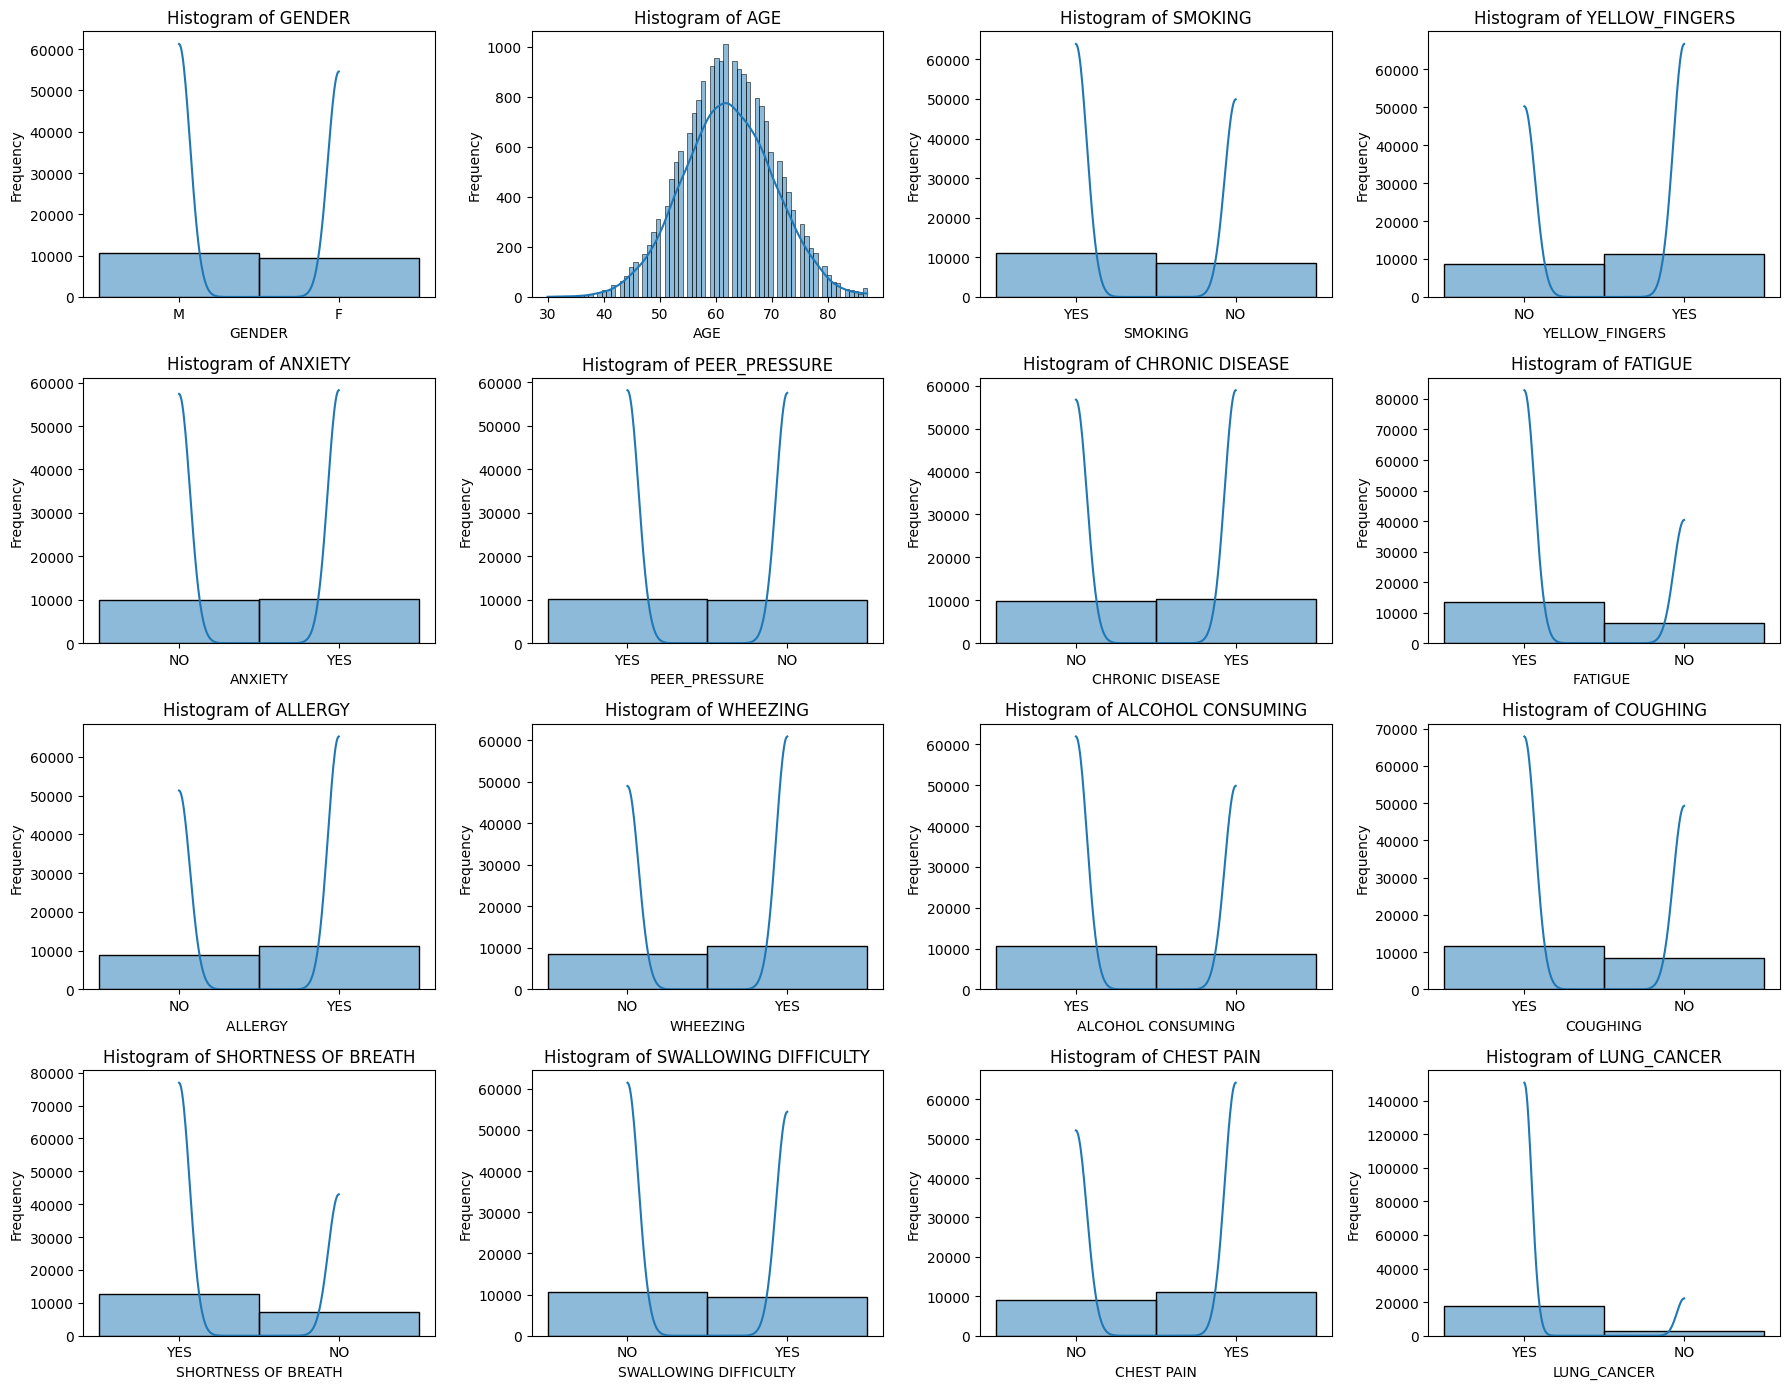

In [ ]:
# Plot a histogram for each columns
plt.figure(figsize=(18, 14))
for i,column in enumerate(df.columns,1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

### Scatterplot

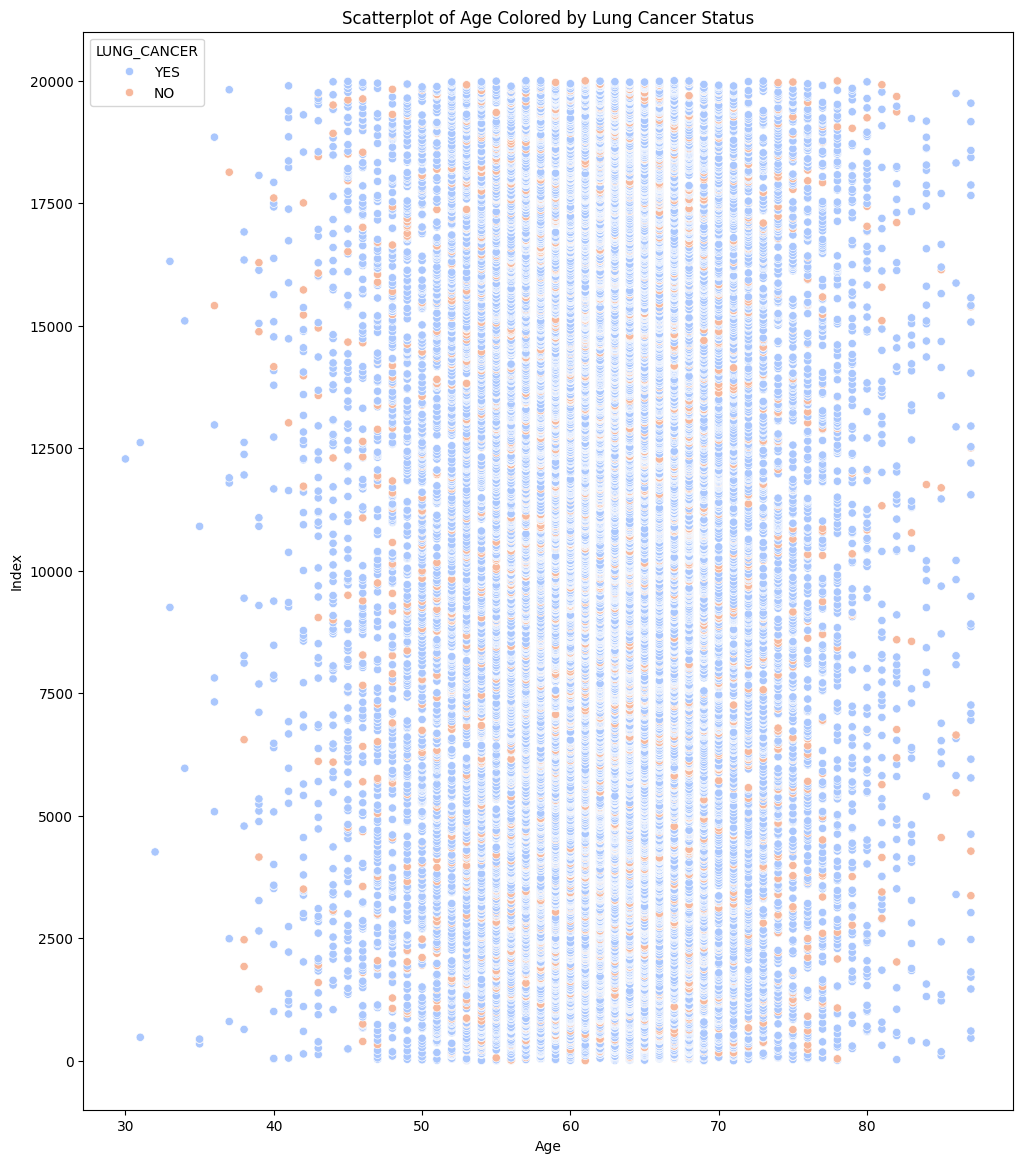

In [ ]:
# Scatterplot of Age Colored by Lung Cancer Status
plt.figure(figsize=(12,14))
sns.scatterplot(x='AGE', y=df.index, hue='LUNG_CANCER', data=df, palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Index')
plt.title('Scatterplot of Age Colored by Lung Cancer Status')
plt.legend(title='LUNG_CANCER')
plt.show()

### Pie Chart

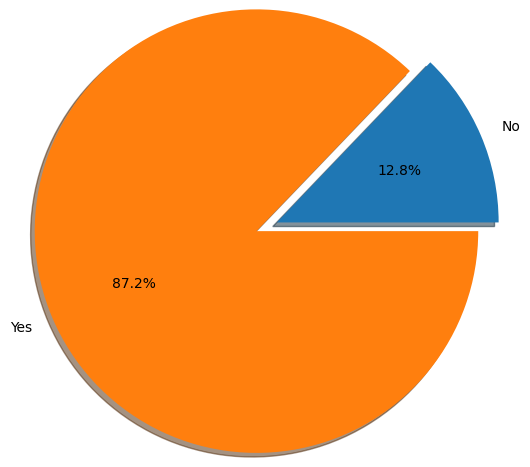

In [ ]:
# Pie Chart For Lung Cancer
r = df.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

**Observation:**
* Yes: 87.2% of the people in the dataset have lung cancer.
* No: 12.8% of the people do not have lung cancer.

### Heatmap

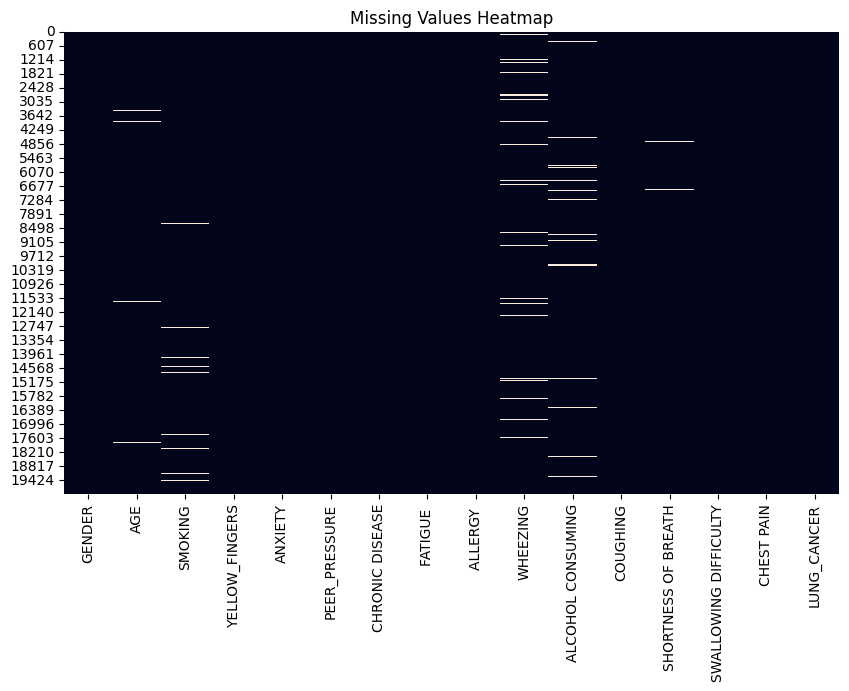

In [ ]:
# Visualize Missing Data Using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

**Observation**

 Missing values mainly occurring in a few Columns are AGE, SMOKING, WHEEZING and ALCOHOL CONSUMING.

##**Data Preprocessing**

### Duplicate the dataset

In [ ]:
# Duplicate the dataset
df2 = df.copy()
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,YES,NO,NO,YES,NO,YES,NO,NO,YES,YES,YES,NO,NO,YES
1,M,71.0,YES,YES,NO,NO,YES,NO,YES,YES,NO,NO,YES,YES,NO,YES
2,M,61.0,YES,NO,NO,YES,YES,NO,YES,YES,NO,NO,YES,YES,YES,NO
3,M,55.0,YES,YES,NO,YES,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES
4,F,56.0,YES,NO,NO,NO,NO,YES,YES,YES,YES,NO,YES,YES,YES,YES


### Remove duplicates

In [ ]:
# Remove duplicates
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

np.int64(0)

### Handling Missing Values

In [ ]:
print('categorical_cols : ',categorical_cols)
print('numerical_cols :',numerical_cols)

categorical_cols :  Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
numerical_cols : Index(['AGE'], dtype='object')


In [ ]:
# Handling Missing values on Numerical columns
df2['AGE'] = df2['AGE'].fillna(df2['AGE'].median())

In [ ]:
# Handling Missing values on Categorical columns
df2['SMOKING'] = df2['SMOKING'].fillna(df2['SMOKING'].mode()[0])
df2['WHEEZING'] = df2['WHEEZING'].fillna(df2['WHEEZING'].mode()[0])
df2['ALCOHOL CONSUMING'] = df2['ALCOHOL CONSUMING'].fillna(df2['ALCOHOL CONSUMING'].mode()[0])
df2['SHORTNESS OF BREATH'] = df2['SHORTNESS OF BREATH'].fillna(df2['SHORTNESS OF BREATH'].mode()[0])

In [ ]:
# Recheck Missing Values
print(df2.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


### Outliers

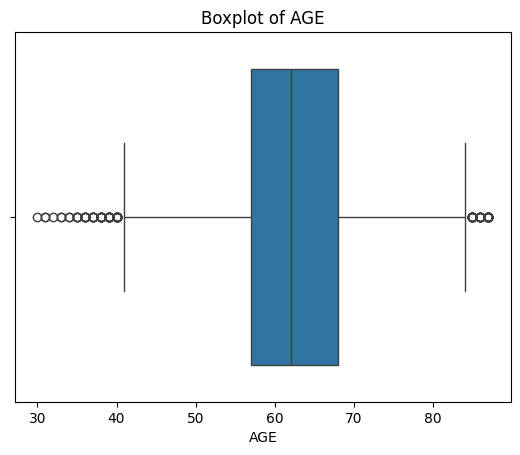

In [ ]:
# Checking Outliers
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE')
plt.show()

**Observation:**
* The AGE column has a few outliers, but the overall shape looks normal.
* Range from 30 to 87, which is a normal and expected age range.

### Skewness

<Axes: xlabel='AGE', ylabel='Density'>

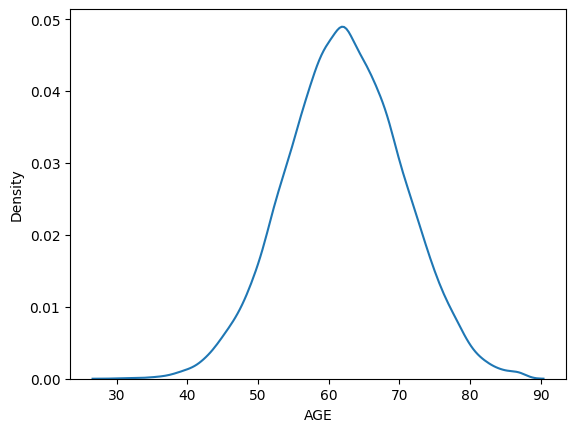

In [ ]:
# plot distribution of Age to find skew

sns.kdeplot(df2['AGE'])

In [ ]:
# skewness score
df2['AGE'].skew().round(4)

np.float64(-0.0044)

**Observation:**

* The AGE column shows a near-normal distribution with skewness close to zero, indicating symmetry around the mean.

* No transformation is needed for AGE as it is not skewed and is suitable for models that assume normally distributed input.

### Columns Renaming

In [ ]:
df2.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
# Replaces any spaces within column names with underscores
df2.columns = df2.columns.str.strip().str.replace(' ', '_')

In [ ]:
df2.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

##**Feature Engineering**

###  Encode Categorical Features

In [ ]:
# Get updated categorical column names after renaming
updated_categorical_cols = df2.select_dtypes(include=['object']).columns

In [ ]:
# Convert Categorical Columns into Numerical format
# Using label encoder
from sklearn.preprocessing import LabelEncoder # import libraries
label_encoder = LabelEncoder()
for column in updated_categorical_cols: # use for loop to covert numerical
    df2[column] = label_encoder.fit_transform(df2[column])
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69.0,1,0,0,1,0,1,0,0,1,1,1,0,0,1
1,1,71.0,1,1,0,0,1,0,1,1,0,0,1,1,0,1
2,1,61.0,1,0,0,1,1,0,1,1,0,0,1,1,1,0
3,1,55.0,1,1,0,1,0,0,0,1,1,0,1,1,1,1
4,0,56.0,1,0,0,0,0,1,1,1,1,0,1,1,1,1


### Feature Selection

In [ ]:
# Use Select K Best - Identify most relevant features
from sklearn.feature_selection import SelectKBest, f_regression
x = df2.drop(columns=['LUNG_CANCER'])  # Features
y = df2['LUNG_CANCER']  # Target
selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['GENDER', 'AGE', 'ANXIETY', 'FATIGUE', 'ALCOHOL_CONSUMING',
       'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'],
      dtype='object')


**Observation:**
* This selected features are top 8 features related to lung cancer.
* These features play an important role in predicting lung cancer.
* This selection is just for reference to select correct features.

### Correlation Analysis

In [ ]:
correlation_matrix = df2.corr()
correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)

,LUNG_CANCER
LUNG_CANCER,1.000000
AGE,0.012145
SHORTNESS_OF_BREATH,0.008936
COUGHING,0.001246
SMOKING,-0.000752
PEER_PRESSURE,-0.001843
WHEEZING,-0.001944
CHRONIC_DISEASE,-0.002732
YELLOW_FINGERS,-0.004868
ALLERGY,-0.005318


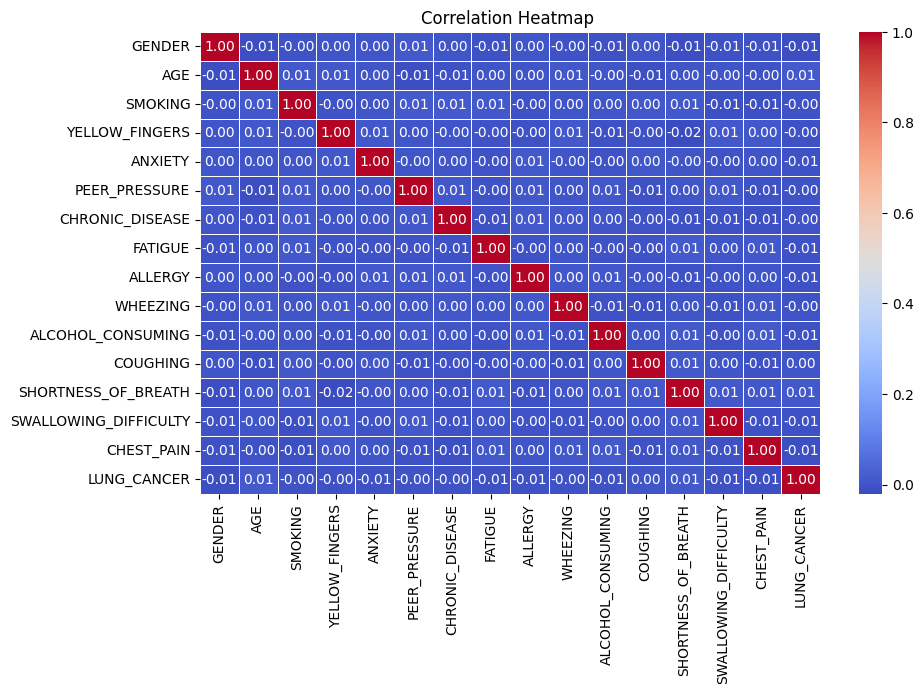

In [ ]:
# Plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

**Observation:**
* The correlation values and heatmap between features and LUNG_CANCER are very low, indicating weak linear relationships.
* This suggests that no single feature shows strong linear correlation with lung cancer.
* This is expected, as medical datasets often do not show strong linear correlations between individual features and the target.
* This result is just for reference.

In [ ]:
# Final feature selection
X = df2.drop(columns=['LUNG_CANCER'])  # Features
y = df2['LUNG_CANCER']  # Target

All columns except the target are considered as features

##**Model Building**

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15723, 15)
(3931, 15)
(15723,)
(3931,)


In [ ]:
!pip install xgboost

### Import All Packages

In [ ]:
# Import all the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=250)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred, zero_division=0))

Logistic Regression Accuracy: 0.8702620198422794
Logistic Regression Confusion Matrix:
 [[   0  510]
 [   0 3421]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       510
           1       0.87      1.00      0.93      3421

    accuracy                           0.87      3931
   macro avg       0.44      0.50      0.47      3931
weighted avg       0.76      0.87      0.81      3931



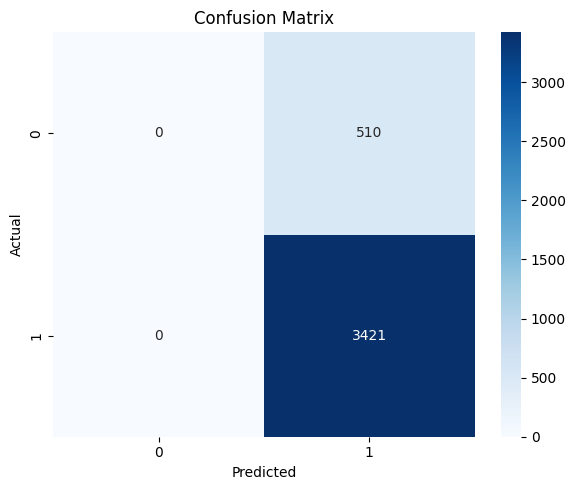

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
# Build and Show AUC-ROC for logistic regression model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)
print("Logistic Regression AUC-ROC:", roc_auc)

Logistic Regression AUC-ROC: 0.5


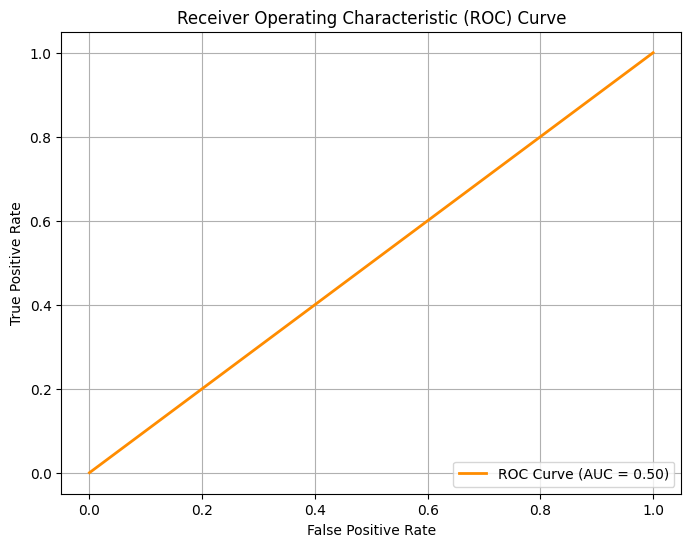

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Observation:**
* AUC = 0.50 indicates no better than random guessing.
* The model is unable to distinguish between the positive and negative classes.

###  K-Nearest Neighbors

In [ ]:
# Select K value using different K values
k_values = [3,5,7]
accuracy_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    knn_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy}')
print(f'best k value : {k}')

Accuracy for k=3: 0.8364283897227168
Accuracy for k=5: 0.8572882218265072
Accuracy for k=7: 0.8639023149325872
best k value : 7


In [ ]:
# KNN Algorithm
knn_model = KNeighborsClassifier(n_neighbors= 7)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred, zero_division=0))

KNN Accuracy: 0.8639023149325872
KNN Confusion Matrix:
 [[   2  508]
 [  27 3394]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.00      0.01       510
           1       0.87      0.99      0.93      3421

    accuracy                           0.86      3931
   macro avg       0.47      0.50      0.47      3931
weighted avg       0.77      0.86      0.81      3931



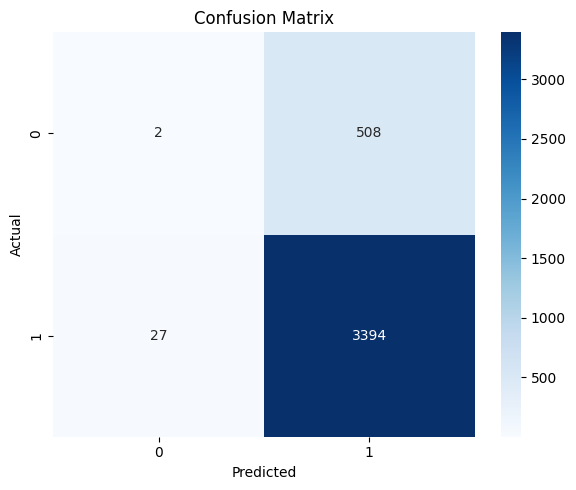

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Observation:**
* The model gave a high accuracy of 86.39% in "n_neighbors 7" parameter.
* It made many false positive errors, predicting something as positive when it was not.
* The model is misclassifying most of the false positive cases.

### Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier( max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred, zero_division=0))

Decision Tree Accuracy: 0.8682269142711778
Decision Tree Confusion Matrix:
 [[   3  507]
 [  11 3410]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.01      0.01       510
           1       0.87      1.00      0.93      3421

    accuracy                           0.87      3931
   macro avg       0.54      0.50      0.47      3931
weighted avg       0.79      0.87      0.81      3931



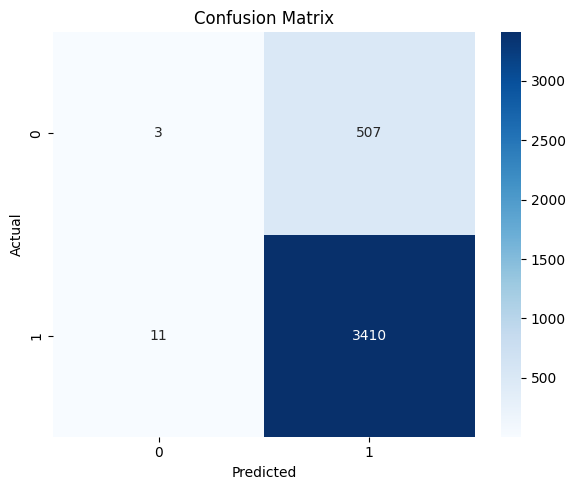

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

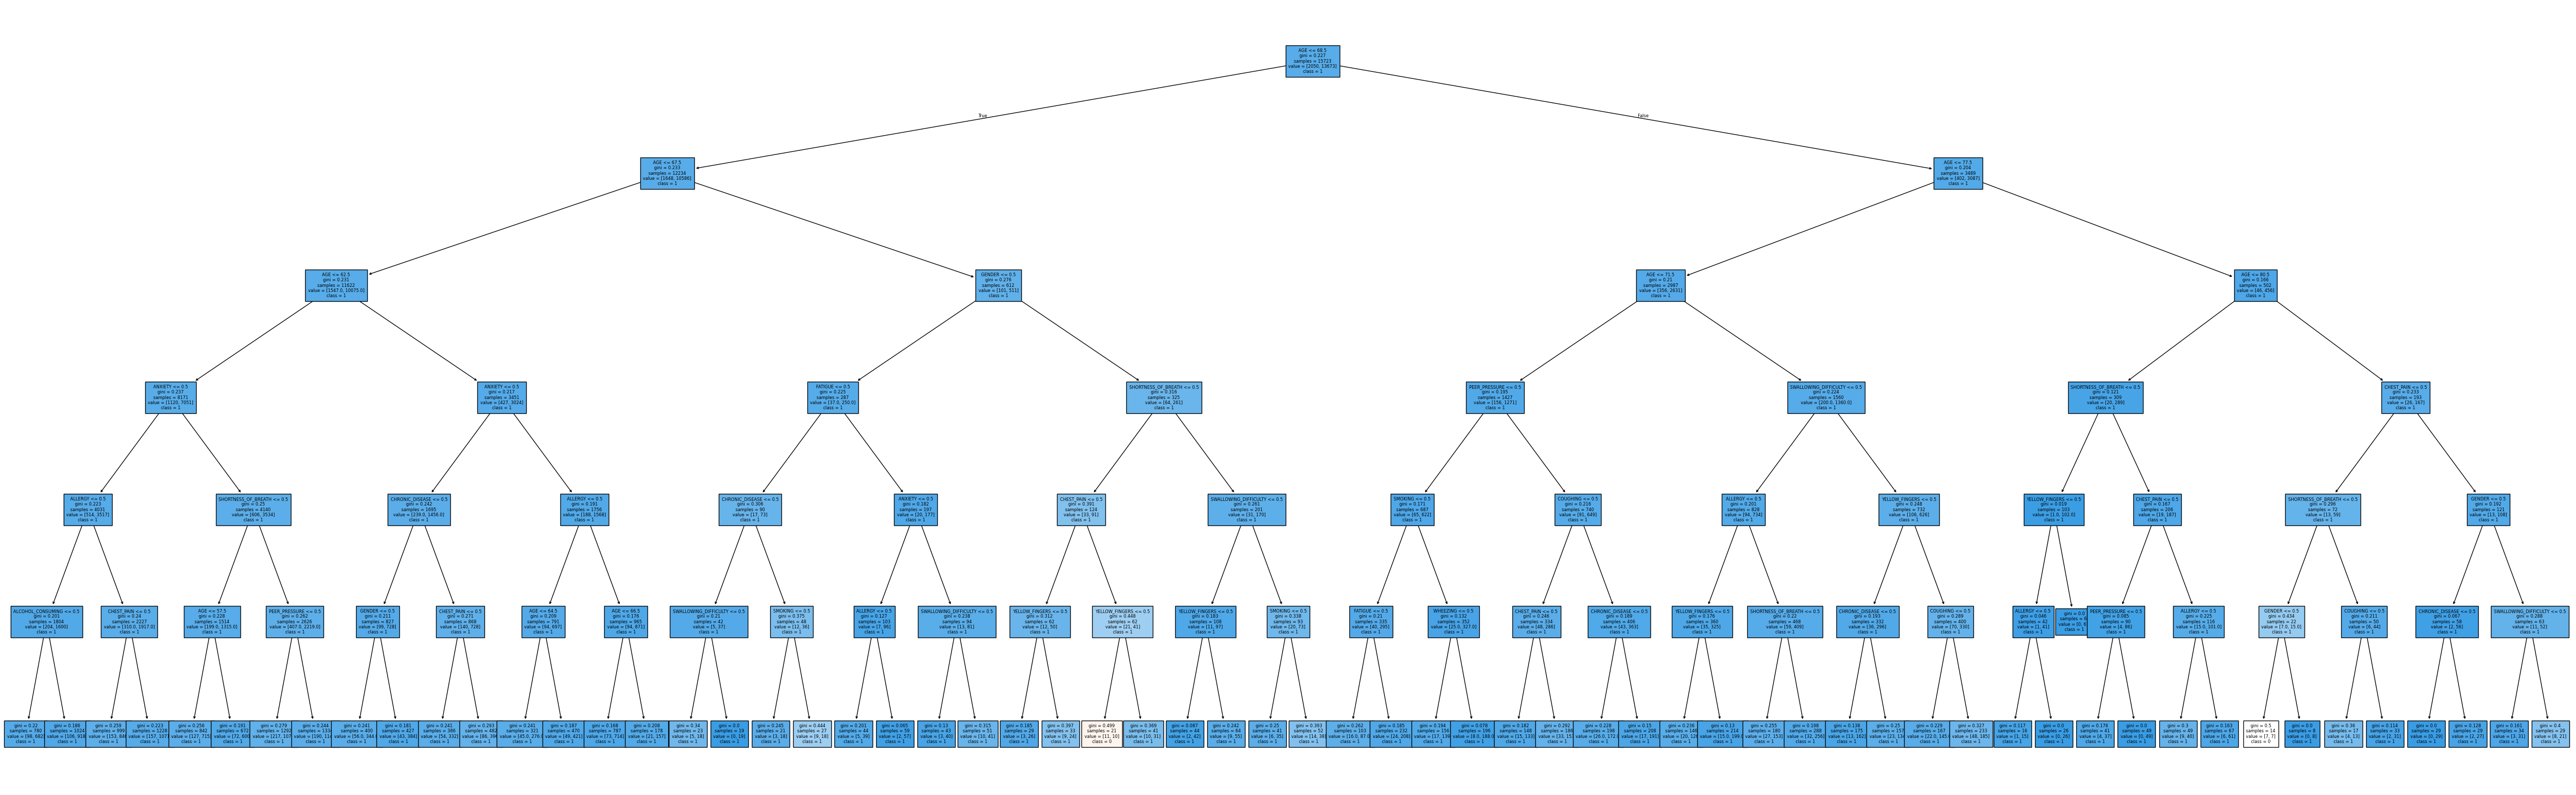

In [ ]:
# Visualize the Decision Tree
from sklearn import tree # import tree from sklearn
plt.figure(figsize=(65,20))
# plot the tree (model and features)
tree.plot_tree(dt_model, feature_names=x.columns, class_names=dt_model.classes_.astype(str), filled=True, fontsize = 6)
plt.show()

**Observation:**
* The model achieved 86.82% accuracy score in "max_depth=6" parameter.
* It predicted the majority group correctly but missed almost all cases from the smaller group.
* The high number of false positives shows.

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8626303739506487
Random Forest Confusion Matrix:
 [[   2  508]
 [  32 3389]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.00      0.01       510
           1       0.87      0.99      0.93      3421

    accuracy                           0.86      3931
   macro avg       0.46      0.50      0.47      3931
weighted avg       0.76      0.86      0.81      3931



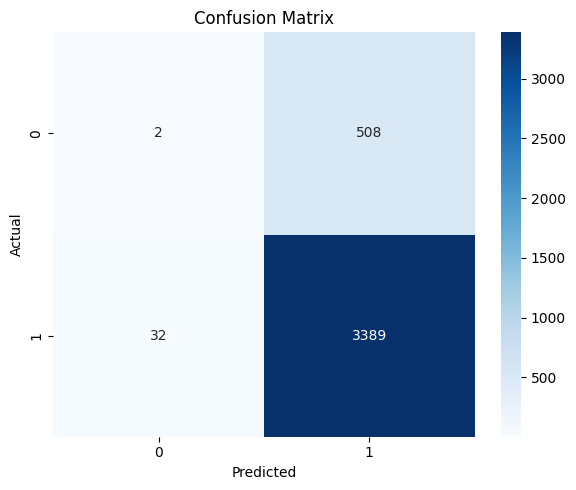

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Observation:**
* Random Forest is high accuracy but many false positives and poor performance on the minority group.
* This model is overfitting.

### Support Vector Machine

In [ ]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred, zero_division=0))

SVM Accuracy: 0.8702620198422794
SVM Confusion Matrix:
 [[   0  510]
 [   0 3421]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       510
           1       0.87      1.00      0.93      3421

    accuracy                           0.87      3931
   macro avg       0.44      0.50      0.47      3931
weighted avg       0.76      0.87      0.81      3931



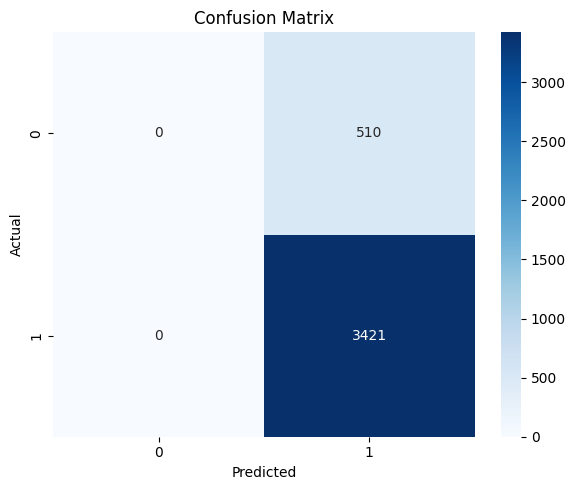

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, nb_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("SVM Classification Report:\n", classification_report(y_test, nb_pred, zero_division=0))

SVM Accuracy: 0.8702620198422794
SVM Confusion Matrix:
 [[   0  510]
 [   0 3421]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       510
           1       0.87      1.00      0.93      3421

    accuracy                           0.87      3931
   macro avg       0.44      0.50      0.47      3931
weighted avg       0.76      0.87      0.81      3931



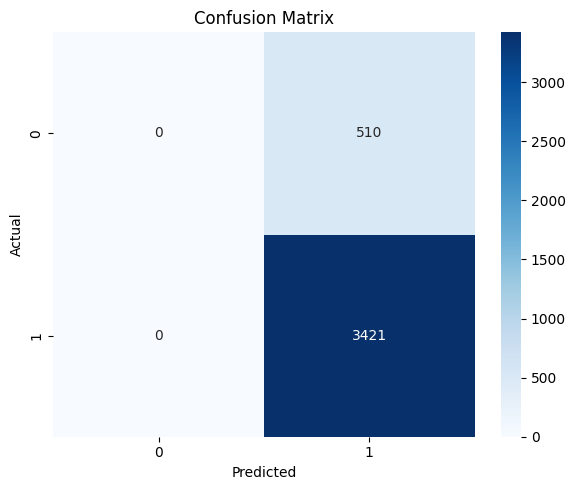

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Observation:**
* The model predicted almost all outcomes as one category only.
* Even after adjusting the balance setting, it couldn’t correctly detect the minority group.

### Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=150,learning_rate=0.2, max_depth=7)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8511829051132027
Gradient Boosting Confusion Matrix:
 [[  14  496]
 [  89 3332]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.03      0.05       510
           1       0.87      0.97      0.92      3421

    accuracy                           0.85      3931
   macro avg       0.50      0.50      0.48      3931
weighted avg       0.78      0.85      0.81      3931



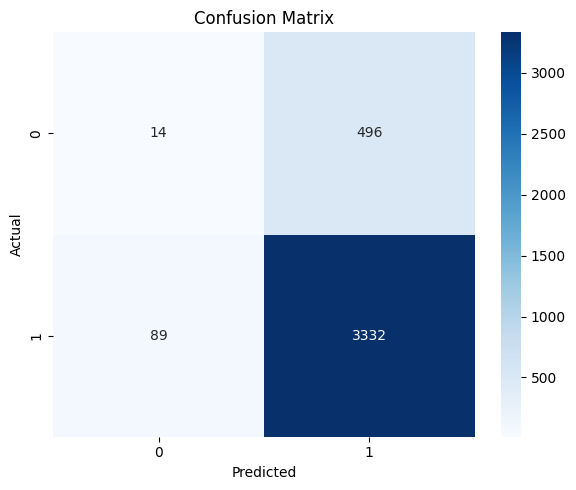

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=150, max_depth=7, learning_rate=0.2, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("Extreme Gradient Boosting Accuracy:", accuracy_score(y_test, xgb_pred))
print("Extreme Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Extreme Gradient Boosting Classification Report:\n", classification_report(y_test, xgb_pred))

Extreme Gradient Boosting Accuracy: 0.8598321037903841
Extreme Gradient Boosting Confusion Matrix:
 [[   5  505]
 [  46 3375]]
Extreme Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.01      0.02       510
           1       0.87      0.99      0.92      3421

    accuracy                           0.86      3931
   macro avg       0.48      0.50      0.47      3931
weighted avg       0.77      0.86      0.81      3931



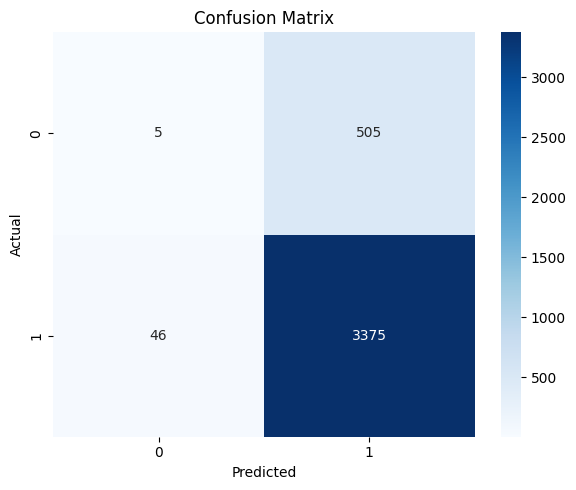

In [ ]:
# Display the confusion matrix using a heatmap
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

##**Model Evaluation and Performance**

### Comparing Model scores

In [ ]:
# Comparing each model with  Accuracy scores and F1 scores
model_scores = {
    'Logistic Regression': (accuracy_score(y_test, lr_pred),f1_score(y_test, lr_pred)),
    'K-Nearest Neighbors': (accuracy_score(y_test, knn_pred),f1_score(y_test, knn_pred)),
    'Decision Tree': (accuracy_score(y_test, dt_pred),f1_score(y_test, dt_pred)),
    'Random Forest': (accuracy_score(y_test, rf_pred),f1_score(y_test, rf_pred)),
    'Support Vector Machine': (accuracy_score(y_test, svm_pred),f1_score(y_test, svm_pred)),
    'Naive Bayes': (accuracy_score(y_test, nb_pred),f1_score(y_test, nb_pred)),
    'Gradient Boosting': (accuracy_score(y_test, gb_pred),f1_score(y_test, gb_pred)),
    'Extreme Gradient Boosting': (accuracy_score(y_test, xgb_pred),f1_score(y_test, xgb_pred))
}

Model_Scores = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Scores'])
Model_Scores[['Accuracy Score','F1 Score']] = pd.DataFrame(Model_Scores.Scores.tolist(), index= Model_Scores.index)
Model_Scores = Model_Scores.drop('Scores',axis=1)
Model_Scores = Model_Scores.sort_values(by='Accuracy Score', ascending=False)
print(Model_Scores)

                       Model  Accuracy Score  F1 Score
0        Logistic Regression        0.870262  0.930631
4     Support Vector Machine        0.870262  0.930631
5                Naive Bayes        0.870262  0.930631
2              Decision Tree        0.868227  0.929409
1        K-Nearest Neighbors        0.863902  0.926943
3              Random Forest        0.862630  0.926209
7  Extreme Gradient Boosting        0.859832  0.924531
6          Gradient Boosting        0.851183  0.919299


**Observation:**
* Logistic Regression, Support Vector Machine, and Naive Bayes achieved the highest accuracy of 87.03% and F1-score of 93.06%, making them the top-performing models in this analysis.

* The Decision Tree model followed closely with 86.82% accuracy and an F1-score of 92.94%, showing consistent performance.

* K-Nearest Neighbors (86.39%) and Random Forest (86.26%) also performed well, maintaining balanced precision and recall, resulting in F1-scores of 92.69% and 92.62%, respectively.

* Extreme Gradient Boosting recorded 85.98% accuracy and an F1-score of 92.45%, performing slightly below the tree-based models.

* Gradient Boosting had the lowest performance, with 84.69% accuracy and an F1-score of 91.69%.

### Visualization of Model Performance

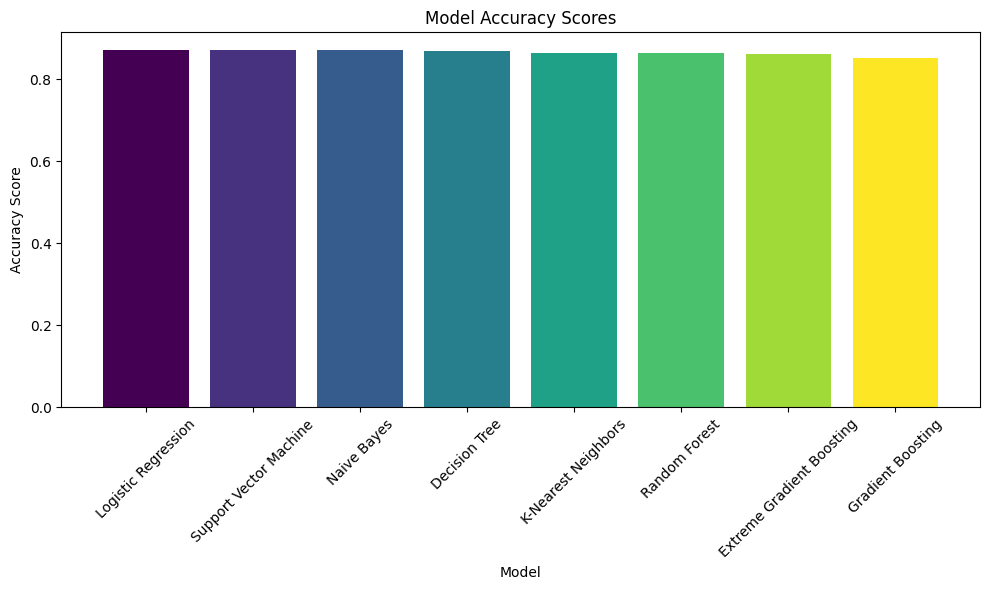

In [ ]:
# Visualization shows the Model Performance based on Accuracy score
colors = plt.cm.viridis(np.linspace(0, 1, len(Model_Scores)))
plt.figure(figsize=(10, 6))
plt.bar(list(Model_Scores['Model']), list(Model_Scores['Accuracy Score']),color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

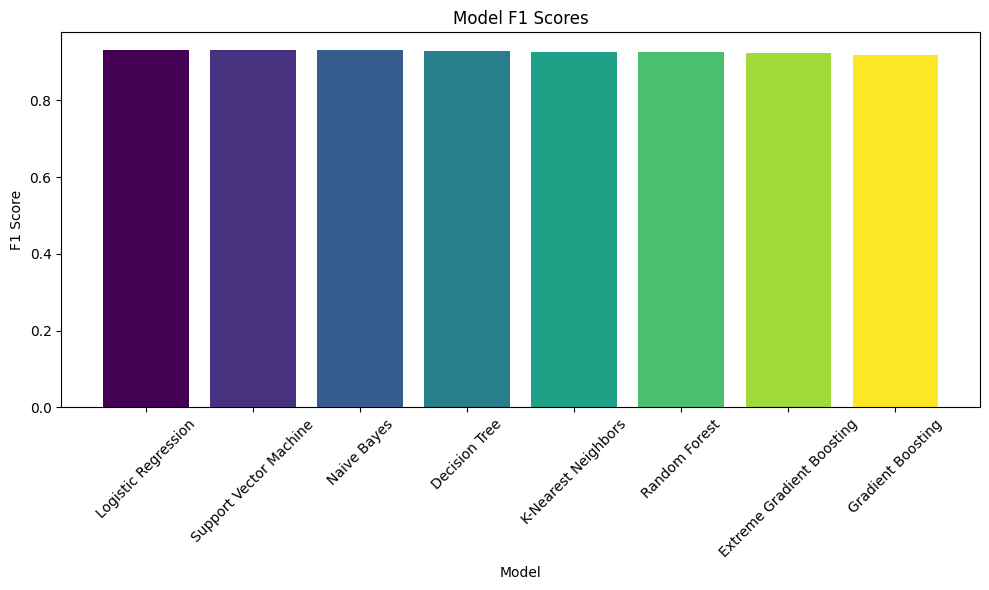

In [ ]:
# Visualization shows the Model Performance based on F1-score
plt.figure(figsize=(10, 6))
plt.bar(list(Model_Scores['Model']), list(Model_Scores['F1 Score']),color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model_eval = {
    'Logistic Regression': (accuracy_score(y_test, lr_pred), precision_score(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred), roc_auc_score(y_test, lr_pred)),
    'K-Nearest Neighbors': (accuracy_score(y_test, knn_pred), precision_score(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred), roc_auc_score(y_test, knn_pred)),
    'Decision Tree': (accuracy_score(y_test, dt_pred), precision_score(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred), roc_auc_score(y_test, dt_pred)),
    'Random Forest': (accuracy_score(y_test, rf_pred), precision_score(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)),
    'Support Vector Machine': (accuracy_score(y_test, svm_pred), precision_score(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)),
    'Naive Bayes': (accuracy_score(y_test, nb_pred), precision_score(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred), roc_auc_score(y_test, nb_pred)),
    'Gradient Boosting': (accuracy_score(y_test, gb_pred), precision_score(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred), roc_auc_score(y_test, gb_pred)),
    'Extreme Gradient Boosting': (accuracy_score(y_test, xgb_pred), precision_score(y_test, xgb_pred), recall_score(y_test, xgb_pred), f1_score(y_test, xgb_pred), roc_auc_score(y_test, xgb_pred))
}

Model_Evaluation = pd.DataFrame(list(model_eval.items()), columns=['Model', 'Metrics'])
Model_Evaluation[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']] = pd.DataFrame(Model_Evaluation.Metrics.tolist(), index=Model_Evaluation.index)
Model_Evaluation.drop('Metrics', axis=1, inplace=True)
Model_Evaluation = Model_Evaluation.sort_values(by=['Accuracy','Precision', 'Recall', 'F1 Score', 'ROC AUC'], ascending=False)
print(Model_Evaluation)


                       Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.870262   0.870262  1.000000  0.930631   
4     Support Vector Machine  0.870262   0.870262  1.000000  0.930631   
5                Naive Bayes  0.870262   0.870262  1.000000  0.930631   
2              Decision Tree  0.868227   0.870564  0.996785  0.929409   
1        K-Nearest Neighbors  0.863902   0.869810  0.992108  0.926943   
3              Random Forest  0.862630   0.869643  0.990646  0.926209   
7  Extreme Gradient Boosting  0.859832   0.869845  0.986554  0.924531   
6          Gradient Boosting  0.851183   0.870428  0.973984  0.919299   

    ROC AUC  
0  0.500000  
4  0.500000  
5  0.500000  
2  0.501333  
1  0.498015  
3  0.497284  
7  0.498179  
6  0.500718  


**Observation:**
* Logistic Regression, SVM, and Naive Bayes have the highest accuracy (87.03%) and perfect recall (1.0) with a strong F1 score (0.9306).

*  ROC AUC scores are very low (~0.5) for all models — this indicates poor discrimination between classes.

* Gradient Boosting and XGBoost performed worse in accuracy and AUC compared to simpler models.


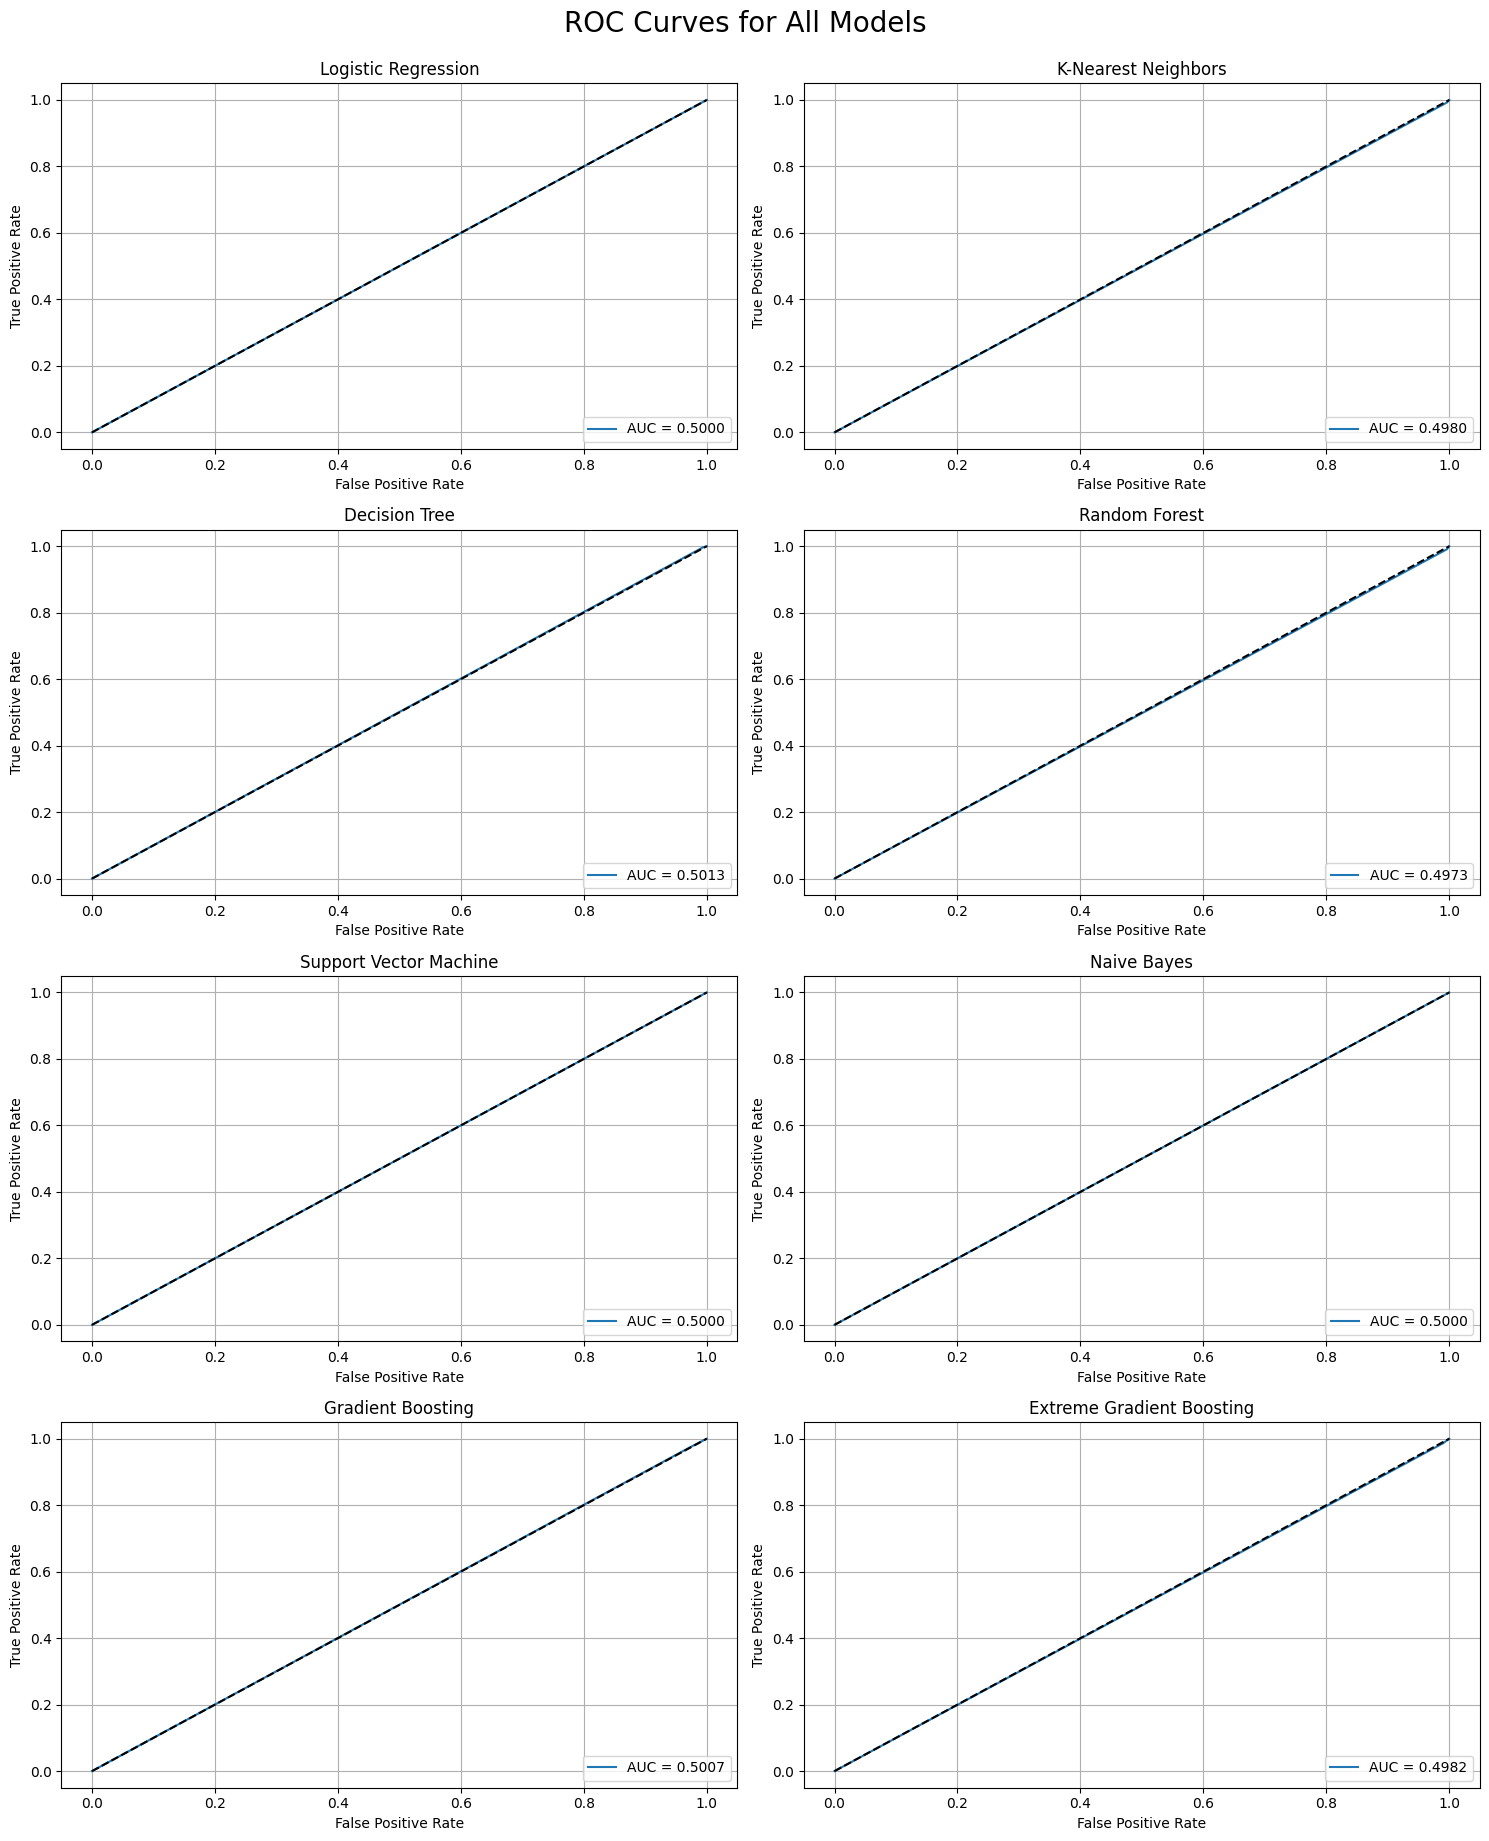

In [ ]:
# ROC Curves for All Models
from sklearn.metrics import roc_curve, roc_auc_score
models = [
    ('Logistic Regression', lr_pred),
    ('K-Nearest Neighbors', knn_pred),
    ('Decision Tree', dt_pred),
    ('Random Forest', rf_pred),
    ('Support Vector Machine', svm_pred),
    ('Naive Bayes', nb_pred),
    ('Gradient Boosting', gb_pred),
    ('Extreme Gradient Boosting', xgb_pred)
]
fig, axes = plt.subplots(4, 2, figsize=(15, 18))  # 4 rows, 2 columns
axes = axes.flatten()
for i, (name, preds) in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, preds)
    auc_score = roc_auc_score(y_test, preds)
    axes[i].plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_title(name)
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].legend(loc='lower right')
    axes[i].grid(True)
plt.tight_layout()
plt.suptitle('ROC Curves for All Models', fontsize=20, y=1.02)
plt.show()

##**Conclusion**
From the evaluation metrics, Logistic Regression, Support Vector Machine (SVM), and Naive Bayes models demonstrate the highest accuracy (87.03%), perfect recall (1.0), and strong F1-scores (0.93). This indicates they are highly effective at capturing positive cases, making them suitable choices when sensitivity is a priority.

However, across all models, the ROC AUC scores hover around 0.5, signaling that the models are not effectively distinguishing between classes. This is a major concern, especially for applications where true positive vs. false positive trade-off matters, such as medical or risk-based predictions.

Tree-based models like Decision Tree, Random Forest, and XGBoost show slightly lower accuracy (~86–87%) but are still competitive with balanced precision and recall scores.

In contrast, Gradient Boosting had the lowest accuracy (84.68%) and weakest overall metrics, indicating it may not be well-suited for this task in its current configuration.